# Machine Learning com Naïve Bayes

## Implementação from scratch...

In [1]:
import csv
import random
import math
from IPython.display import Image

def loadCsv(filename):
	lines = csv.reader(open(filename, "r"))
	dataset = list(lines)
	for i in range(len(dataset)):
		dataset[i] = [float(x) for x in dataset[i]]
	return dataset
 
def splitDataset(dataset, splitRatio):
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	copy = list(dataset)
	while len(trainSet) < trainSize:
		index = random.randrange(len(copy))
		trainSet.append(copy.pop(index))
	return [trainSet, copy]
 
def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated
 
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)
 
def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries
 
def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.items():
		summaries[classValue] = summarize(instances)
	return summaries
 
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
 
def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities
			
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel
 
def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions
 
def getAccuracy(testSet, predictions):
	correct = 0
	for i in range(len(testSet)):
		if testSet[i][-1] == predictions[i]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

### Dataset: Pima Indians Diabetes Database
**Pregnancies:** Number of times pregnant  
**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
**BloodPressure:** Diastolic blood pressure (mm Hg)  
**SkinThickness:** Triceps skin fold thickness (mm)  
**Insulin:** 2-Hour serum insulin (mu U/ml)  
**BMI:** Body mass index (weight in kg/(height in m)^2)  
**DiabetesPedigreeFunction:** Diabetes pedigree function  
**Age:** Age (years)  
**Outcome:** Class variable (0 or 1)  

### Leitura...

In [5]:
filename = 'diabetes.csv'
splitRatio = 0.67
dataset = loadCsv(filename)
trainingSet, testSet = splitDataset(dataset, splitRatio)
print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingSet), len(testSet)))

Split 768 rows into train=514 and test=254 rows


### Aprendizado das probabilidades...
Para cada classe, média e desvio padrão para cada atributo.  
Isso é usado para calcular a probabilidade de um novo exemplo (vetor de atributos) com classe desconhecida pertencer a cada uma das classes.

$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}$

$P(x_i|y,x_1,\dots,x_{i-1},x_{i+1},\dots,x_n)=P(x_i|y)$

$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^{n}P(x_i|y)}{P(x_1,\dots,x_n)}$

$P(y|x_1,\dots,x_n)\propto P(y)\prod_{i=1}^{n}P(x_i|y)$

#### Gaussian Naive Bayes¶

$P(x_i|y)=\frac{1}{\sqrt(2\pi \sigma_y^2)}\exp(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2})$

In [20]:
summaries = summarizeByClass(trainingSet)
print('Summary by class value: {0}'.format(summaries))

Summary by class value: {0.0: [(3.2006079027355625, 2.9574007407726737), (108.80851063829788, 25.1291139193685), (67.58662613981762, 18.733999771106724), (19.486322188449847, 14.82295809672758), (68.64133738601824, 90.7619117663033), (30.012158054711268, 7.964167344244948), (0.42812158054711247, 0.2909370119616986), (30.58966565349544, 11.22980638356075)], 1.0: [(4.9837837837837835, 3.719039841720011), (139.72972972972974, 33.61373348396314), (71.29729729729729, 21.42335284224964), (21.589189189189188, 17.318433628961717), (99.38378378378378, 139.43651647581234), (35.11135135135137, 7.336776837247876), (0.5313081081081082, 0.3372799237202992), (37.167567567567566, 10.914640498124081)]}


### Fazendo uma predição...
Calcular a probabilidade de um dado exemplo pertencer a cada uma das classes...e, assim, identificar a classe com maior probabilidade.

$\hat{y}=\arg\max_{y}P(y)\prod_{i=1}^{n}P(x_i|y)$

In [22]:
inputVector = [9,0,64,0,0,24,0.670,25,'?']
result = predict(summaries, inputVector)
print('Prediction: {0}'.format(result)) 

Prediction: 0.0


### Predições para todos os exemplos do conjunto de treinamento...

In [23]:
predictions = getPredictions(summaries, testSet) 

### Calcular a acurácia do modelo treinado...
As classes identificadas são comparadas com as reais e a acurácia do modelo é então calculada: [0%, 100%].

In [24]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: {0}%'.format(accuracy))

Accuracy: 70.86614173228347%


## Implementação com scikit-learn...

#### Dataset = Iris

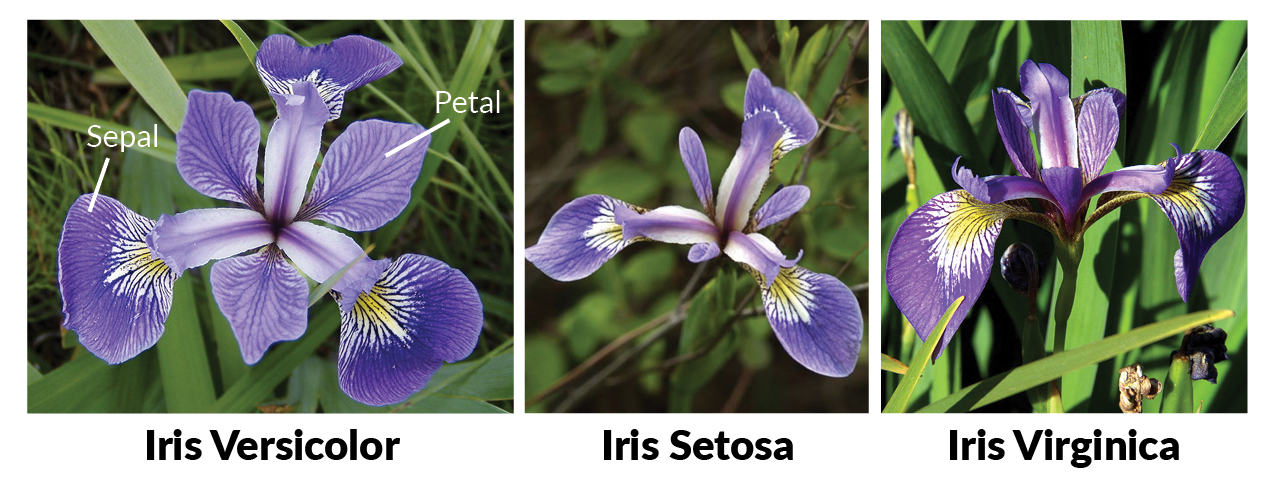

In [26]:
Image(filename='iris.png', width=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Class labels: [0 1 2]


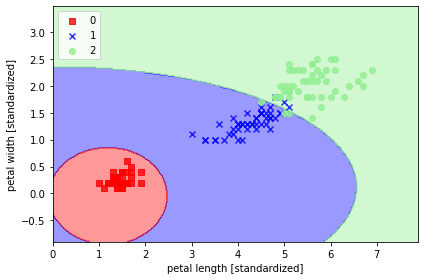

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

plot_decision_regions(X, y,classifier=gnb)#, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()